In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

/home/user1/miniconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Markov Chain Monte Carlo

In [2]:
#Get acceptance likelihood
def get_prob_symm(x, y, target):
    return min([target(y)/target(x), 1])

#Uniform proposal density
def uprop(factor):
    return lambda x:x + factor*2*(np.random.rand(x.size) - 0.5)

#Multivariate Gaussian proposal density
def normprop(cov):
    return lambda x:x + np.random.multivariate_normal(np.zeros(x.size), cov)

#Multivariate Gaussian function wrapper
def multnorm(mean, cov):
    return lambda x: st.multivariate_normal.pdf(x, mean=mean, cov=cov)

#MCMC Algorithm body
def mcmc_mh_symm(init, target=multnorm(mean=np.array([1, 2]), cov=np.array([[1, 0.9], [0.9, 1]])), prop=normprop(np.eye(2)), burnin=500, maxiter=2000):
    
    #Initializing parameterss
    count = 1
    x = init
    distr = []
    acceptance = 0
    
    while count < maxiter:
        count += 1
        y = prop(x)
        prob_acceptance = get_prob_symm(x, y, target)
        u = np.random.rand()
        if u < prob_acceptance:
            x = y
            #incrementing number of accepted solutions
            acceptance += 1
        else:
            continue
        distr.append(x)
    return np.array(distr[burnin:]), acceptance                 


## Example 1

In this example and the proceeding, the target distribution is given by a multivariate Gaussian with distribution

$\boldsymbol{X} \sim \mathcal{N} \left( 
    \begin{bmatrix} 
        0 \\ 
        0
    \end{bmatrix},
    \begin{bmatrix}
        1 & 0.9 \\
        0.9 & 1
    \end{bmatrix}
    \right) 
$

Here we run the algorithm with radially symmetric proposal distribution given by bivariate Gaussian centred at $\boldsymbol{0}$. Running the below code-block will run the algorithm and plot the approximated distribution of $X$ as well as the post-burned iterations of the first component, to give an idea of the behavior of the markov chain.

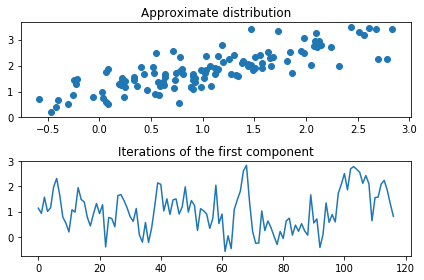

In [3]:
distr, acc = mcmc_mh_symm(np.zeros(2), prop=normprop(np.eye(2)))

plt.subplot(2, 1, 1)
plt.scatter(distr[:, 0], distr[:, 1])
plt.title("Approximate distribution")
plt.subplot(2, 1, 2)
plt.title("Iterations of the first component")
plt.plot(np.array([x[0] for x in distr]))
plt.tight_layout()
plt.show()

## Example 2

The same target distribution as above, however this time the proposal is 2-d uniform instead of Gaussian. Final approximate target disttibution as well as the iterations of the first component are plotted. 

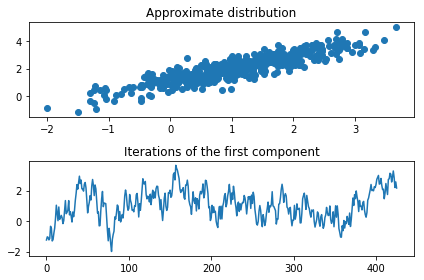

In [4]:
distr, acc = mcmc_mh_symm(np.zeros(2), prop=uprop(1))

plt.subplot(2, 1, 1)
plt.scatter(distr[:, 0], distr[:, 1])
plt.title("Approximate distribution")
plt.subplot(2, 1, 2)
plt.title("Iterations of the first component")
plt.plot(np.array([x[0] for x in distr]))
plt.tight_layout()
plt.show()